<a href="https://colab.research.google.com/github/mmarossi/Heart_attack/blob/main/Heart_attack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Heart Attack**




Vamos analisar uma base de pacientes propensos ou não a ter ataques cardiacos de acordo com o histórico de dados obtido em: www.kaggle.com

### *Importando* bibliotecas


In [41]:
import pandas as pd #biblioteca para manipulação de dados
import numpy as np #biblioteca para utilizacao de vetores e matrizes
import matplotlib.pyplot as plt #bibloteca para plotar graficos

In [42]:
from google.colab import files  #biblioteca utilizada para carregar os dados para o google colab
uploaded = files.upload()

Saving heart.csv to heart (1).csv


### Carregamento dos dados

In [43]:
nome_do_arquivo="heart.csv"

In [44]:
df=pd.read_csv(nome_do_arquivo)
df.head(3)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


age - Age of the person / 
sex - Gender of the person / 
cp - Chest Pain type chest pain type / 
trtbps - resting blood pressure (in mm Hg) / 
chol - cholestoral in mg/dl fetched via BMI sensor / 
fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) / 
restecg - resting electrocardiographic results / 
thalachh - maximum heart rate achieved / 
exng - exercise induced angina (1 = yes; 0 = no) / 
oldpeak - Previous peak / 
slp – Slope / 
caa - number of major vessels (0-3) / 
thall - Thal rate / 
output - Target variable


In [45]:
print('Amostras e Features:', df.shape)

Amostras e Features: (303, 14)


In [46]:
# tipos das features
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

### Pré processamento

Uma outra etapa importante do pré-processamento consiste na avaliação de dados faltantes. 



In [47]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [48]:
# armazenando os labels em um array
labels = np.array(df['output'])

# salvando a ordem das features
feature_list = list(df.columns)

In [49]:
# removendo a coluna de labels do df original
df = df.drop('output', axis = 1)

# check
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall'],
      dtype='object')

In [50]:
# convertendo df para array
data = np.array(df)

Agora estamos quase prontos para a modelagem em si!

Precisamos apenas separar uma parte dos nossos dados para que seja possível avaliar os modelos que vamos treinar. 

In [51]:
# importar train_test_split do scikitlearn 
from sklearn.model_selection import train_test_split

# aplicando a funcao train_test_split para separar os conjuntos de treino e 
# teste segundo uma porcentagem de separação definida. 
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size = 0.25, random_state = 42)

### Baseline: Comparando com um modelo aleatorio!

Podemos criar uma base de comparação para os modelos que queremos avaliar. 

No caso da classificação, o baseline pode ser construído a partir de um modelo aleatório. Nesse caso, são atribuídos 0s e 1s de forma aleatória para todas as amostras de teste. Podemos pensar que o modelo baseline é apenas um chute aleatório sobre o resultado do teste positivo ou negativo. 

In [52]:
# criando baseline
baseline_preds = np.random.choice([0,1], size = len(test_labels))

print(baseline_preds)

[0 1 1 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1
 1 1 0 0 1 1 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1
 1 0]


In [53]:
# importar biblioteca para calculo de métricas
from sklearn import metrics  

# calculando medidas de erro
# essas medidas são calculadas a partir da comparação com o valor real do nosso conjunto de teste
print('Matriz de Confusão\n', metrics.confusion_matrix(test_labels, baseline_preds)) 
print('\nAcurácia\n', metrics.accuracy_score(test_labels, baseline_preds)) 
print('\nAcurácia Balanceada por classe\n', metrics.balanced_accuracy_score(test_labels, baseline_preds)) 
print('\nPrecision\n', metrics.precision_score(test_labels, baseline_preds)) 
print('\nRecall\n', metrics.recall_score(test_labels, baseline_preds)) 
print('\nF1\n', metrics.f1_score(test_labels, baseline_preds)) 

print('\nAUCROC\n', metrics.roc_auc_score(test_labels, baseline_preds))

Matriz de Confusão
 [[15 20]
 [19 22]]

Acurácia
 0.4868421052631579

Acurácia Balanceada por classe
 0.4825783972125436

Precision
 0.5238095238095238

Recall
 0.5365853658536586

F1
 0.5301204819277109

AUCROC
 0.4825783972125436


In [54]:
print('\nClassification Report\n', metrics.classification_report(test_labels, baseline_preds)) 


Classification Report
               precision    recall  f1-score   support

           0       0.44      0.43      0.43        35
           1       0.52      0.54      0.53        41

    accuracy                           0.49        76
   macro avg       0.48      0.48      0.48        76
weighted avg       0.49      0.49      0.49        76



Agora que avaliamos nosso baseline e identificamos o erro desse modelo, podemos criar outros modelos de classificação e comparar os resultados encontrados!

Dica: Se não conseguirmos um erro menor do que o baseline, talvez precisemos repensar nossa abordagem.

Vamos dar uma olhada como ficou o nosso baseline em relação as amostras de teste?

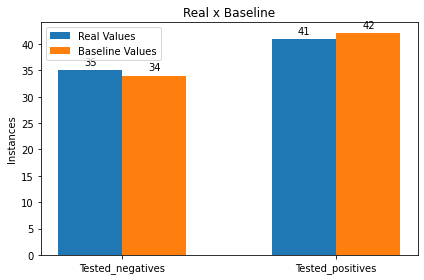

In [55]:
#criando labels e os valores armazenados nas barras
labels = ['Tested_negatives', 'Tested_positives']
count_test = [(test_labels == 0).sum(), (test_labels == 1).sum()]
count_baseline = [(baseline_preds == 0).sum(), (baseline_preds == 1).sum()]

#criando as barras
x = np.arange(len(labels))  
width = 0.3 

#criando os plots
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, count_test, width, label='Real Values')
rects2 = ax.bar(x + width/2, count_baseline, width, label='Baseline Values')

# Adiconando rotulos, titulos
ax.set_ylabel('Instances')
ax.set_title('Real x Baseline')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

#plotando o grafico de barras agrupadas
autolabel(rects1)
autolabel(rects2)
fig.tight_layout()

plt.show()

# KNN

Vamos aplicar o modelo de classificação: o k-nearest neighbors!

In [56]:
# importar o modelo de KNN
from sklearn.neighbors import KNeighborsClassifier 

# treinando o modelo no conjunto de dados de treino
classifier = KNeighborsClassifier().fit(train_data, train_labels);

In [57]:
# aplicando o modelo treinado 
#em todo o conjunto de teste
predictions1_labels = classifier.predict(test_data)

# Exibindo dataframe com valores 10 reais e suas respectivas previsões
p = pd.DataFrame({'Real': test_labels, 'Previsto': predictions1_labels})  
p.head(10)

,Real,Previsto
0,0,0
1,0,1
2,1,1
3,0,1
4,1,0
5,1,1
6,1,1
7,0,0
8,0,0
9,1,1


In [58]:
#avaliando o modelo
print('Matriz de Confusão\n', metrics.confusion_matrix(test_labels, predictions1_labels)) 
print('\nAcurácia\n', metrics.accuracy_score(test_labels, predictions1_labels)) 
print('\nAcurácia Balanceada por classe\n', metrics.balanced_accuracy_score(test_labels, predictions1_labels)) 
print('\nPrecision\n', metrics.precision_score(test_labels, predictions1_labels)) 
print('\nRecall\n', metrics.recall_score(test_labels, predictions1_labels)) 
print('\nF1\n', metrics.f1_score(test_labels, predictions1_labels)) 

print('\nAUCROC\n', metrics.roc_auc_score(test_labels, predictions1_labels))

Matriz de Confusão
 [[22 13]
 [10 31]]

Acurácia
 0.6973684210526315

Acurácia Balanceada por classe
 0.6923344947735192

Precision
 0.7045454545454546

Recall
 0.7560975609756098

F1
 0.7294117647058823

AUCROC
 0.6923344947735192


Resuminho:

In [59]:
print('\nClassification Report\n', metrics.classification_report(test_labels, predictions1_labels)) 


Classification Report
               precision    recall  f1-score   support

           0       0.69      0.63      0.66        35
           1       0.70      0.76      0.73        41

    accuracy                           0.70        76
   macro avg       0.70      0.69      0.69        76
weighted avg       0.70      0.70      0.70        76



O knn ja encontrou um erro bem menor do que o encontrado pelo nosso baseline! 
Entretanto, as medidas ainda estão proximas do resultado de um modelo aleatorio. 

Vamos dar uma olhada como ficou o knn em relação as amostras de teste?


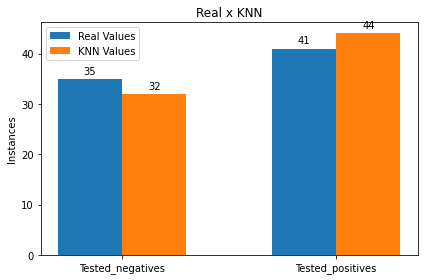

In [60]:
labels = ['Tested_negatives', 'Tested_positives']
count_test = [(test_labels == 0).sum(), (test_labels == 1).sum()]
count_knn = [(predictions1_labels == 0).sum(), (predictions1_labels == 1).sum()]

x = np.arange(len(labels))  
width = 0.3  

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, count_test, width, label='Real Values')
rects2 = ax.bar(x + width/2, count_knn, width, label='KNN Values')

ax.set_ylabel('Instances')
ax.set_title('Real x KNN')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
fig.tight_layout()

plt.show()

# Support Vector Machine SVM

In [61]:
#importar o modelo SVM
from sklearn.svm import SVC

# instanciacao e determinacao dos hiperparâmetros do SVM: tipo de kernel
classifier = SVC(kernel='rbf')

# treinando o SVM
classifier.fit(train_data,train_labels)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [62]:
# aplicando o modelo treinado 
#em todo o conjunto de teste
predictions2_labels = classifier.predict(test_data)

# Exibindo dataframe com valores 10 reais e suas respectivas previsões
p = pd.DataFrame({'Real': test_labels, 'Previsto': predictions2_labels})  
p.head(10)

,Real,Previsto
0,0,0
1,0,1
2,1,1
3,0,1
4,1,0
5,1,1
6,1,1
7,0,0
8,0,0
9,1,1


In [63]:
print('Matriz de Confusão\n', metrics.confusion_matrix(test_labels, predictions2_labels)) 
print('\nAcurácia\n', metrics.accuracy_score(test_labels, predictions2_labels)) 
print('\nAcurácia Balanceada por classe\n', metrics.balanced_accuracy_score(test_labels, predictions2_labels)) 
print('\nPrecision\n', metrics.precision_score(test_labels, predictions2_labels)) 
print('\nRecall\n', metrics.recall_score(test_labels, predictions2_labels)) 
print('\nF1\n', metrics.f1_score(test_labels, predictions2_labels)) 

print('\nAUCROC\n', metrics.roc_auc_score(test_labels, predictions2_labels))

Matriz de Confusão
 [[16 19]
 [ 4 37]]

Acurácia
 0.6973684210526315

Acurácia Balanceada por classe
 0.6797909407665506

Precision
 0.6607142857142857

Recall
 0.9024390243902439

F1
 0.7628865979381443

AUCROC
 0.6797909407665506


Resuminho...

In [64]:
print('\nClassification Report\n', metrics.classification_report(test_labels, predictions2_labels)) 


Classification Report
               precision    recall  f1-score   support

           0       0.80      0.46      0.58        35
           1       0.66      0.90      0.76        41

    accuracy                           0.70        76
   macro avg       0.73      0.68      0.67        76
weighted avg       0.72      0.70      0.68        76



Vamos olhar como ficou o modelo? :)


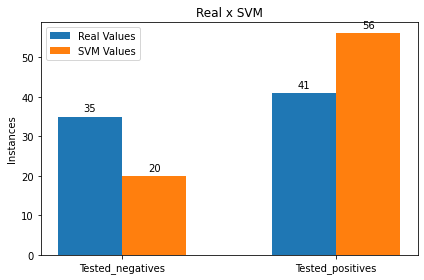

In [65]:
labels = ['Tested_negatives', 'Tested_positives']
count_test = [(test_labels == 0).sum(), (test_labels == 1).sum()]
count_svm = [(predictions2_labels == 0).sum(), (predictions2_labels == 1).sum()]

x = np.arange(len(labels))  
width = 0.3 

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, count_test, width, label='Real Values')
rects2 = ax.bar(x + width/2, count_svm, width, label='SVM Values')

ax.set_ylabel('Instances')
ax.set_title('Real x SVM')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
fig.tight_layout()

plt.show()

# Random Forest Classifiers


In [66]:
# importar o modelo Random Forest Regressor
from sklearn.ensemble import RandomForestClassifier

# treinando o modelo 
classifier = RandomForestClassifier(n_estimators= 10, random_state=42).fit(train_data, train_labels);

In [67]:
# aplicando o modelo treinado para a previsão do resultado do teste
predictions3_labels = classifier.predict(test_data)

# Exibindo dataframe com valores 10 reais e suas respectivas previsões
p = pd.DataFrame({'Real': test_labels, 'Previsto': predictions3_labels})  
p.head(10)

,Real,Previsto
0,0,0
1,0,1
2,1,0
3,0,0
4,1,1
5,1,1
6,1,0
7,0,0
8,0,0
9,1,1


In [68]:
print('Matriz de Confusão\n', metrics.confusion_matrix(test_labels, predictions3_labels)) 
print('\nAcurácia\n', metrics.accuracy_score(test_labels, predictions3_labels)) 
print('\nAcurácia Balanceada por classe\n', metrics.balanced_accuracy_score(test_labels, predictions3_labels)) 
print('\nPrecision\n', metrics.precision_score(test_labels, predictions3_labels)) 
print('\nRecall\n', metrics.recall_score(test_labels, predictions3_labels)) 
print('\nF1\n', metrics.f1_score(test_labels, predictions3_labels)) 

print('\nAUCROC\n', metrics.roc_auc_score(test_labels, predictions3_labels))

Matriz de Confusão
 [[29  6]
 [ 8 33]]

Acurácia
 0.8157894736842105

Acurácia Balanceada por classe
 0.8167247386759582

Precision
 0.8461538461538461

Recall
 0.8048780487804879

F1
 0.8250000000000001

AUCROC
 0.8167247386759581


Resuminho...



In [69]:
print('\nClassification Report\n', metrics.classification_report(test_labels, predictions3_labels)) 


Classification Report
               precision    recall  f1-score   support

           0       0.78      0.83      0.81        35
           1       0.85      0.80      0.83        41

    accuracy                           0.82        76
   macro avg       0.81      0.82      0.82        76
weighted avg       0.82      0.82      0.82        76



Vamos olhar como ficou o modelo:


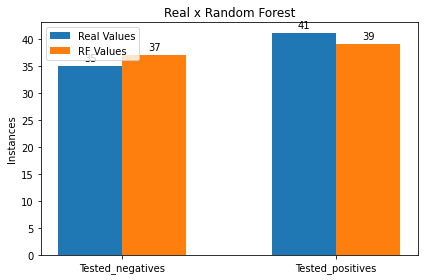

In [70]:
labels = ['Tested_negatives', 'Tested_positives']
count_test = [(test_labels == 0).sum(), (test_labels == 1).sum()]
count_rf = [(predictions3_labels == 0).sum(), (predictions3_labels == 1).sum()]

x = np.arange(len(labels))  
width = 0.3 

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, count_test, width, label='Real Values')
rects2 = ax.bar(x + width/2, count_rf, width, label='RF Values')

ax.set_ylabel('Instances')
ax.set_title('Real x Random Forest')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
fig.tight_layout()

plt.show()

Vamos agora comparar os resultados do 3 modelos de classificação e o nosso baseline?

In [71]:
print('Erros do Baseline\n')
print('Classification Report\n', metrics.classification_report(test_labels, baseline_preds)) 


Erros do Baseline

Classification Report
               precision    recall  f1-score   support

           0       0.44      0.43      0.43        35
           1       0.52      0.54      0.53        41

    accuracy                           0.49        76
   macro avg       0.48      0.48      0.48        76
weighted avg       0.49      0.49      0.49        76



In [72]:
print('Erros do KNN\n')
print('Classification Report\n', metrics.classification_report(test_labels, predictions1_labels)) 

Erros do KNN

Classification Report
               precision    recall  f1-score   support

           0       0.69      0.63      0.66        35
           1       0.70      0.76      0.73        41

    accuracy                           0.70        76
   macro avg       0.70      0.69      0.69        76
weighted avg       0.70      0.70      0.70        76



In [73]:
print('Erros do SVM')
print('Classification Report\n', metrics.classification_report(test_labels, predictions2_labels)) 

Erros do SVM
Classification Report
               precision    recall  f1-score   support

           0       0.80      0.46      0.58        35
           1       0.66      0.90      0.76        41

    accuracy                           0.70        76
   macro avg       0.73      0.68      0.67        76
weighted avg       0.72      0.70      0.68        76



In [74]:
print('Erros do Random Forest Classifier')
print('Classification Report\n', metrics.classification_report(test_labels, predictions3_labels)) 

Erros do Random Forest Classifier
Classification Report
               precision    recall  f1-score   support

           0       0.78      0.83      0.81        35
           1       0.85      0.80      0.83        41

    accuracy                           0.82        76
   macro avg       0.81      0.82      0.82        76
weighted avg       0.82      0.82      0.82        76

